In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



# Load data.
test = pd.read_csv('/content/test values.csv')
data = pd.read_csv('/content/Train value with labels.csv')




In [ ]:
data.head(3)

id  amount_tsh  ... waterpoint_type_group status_group
0  69572      6000.0  ...    communal standpipe   functional
1   8776         0.0  ...    communal standpipe   functional
2  34310        25.0  ...    communal standpipe   functional

[3 rows x 41 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [ ]:
data.shape

(59400, 41)

In [ ]:
data.head(3)

id  amount_tsh  ... waterpoint_type_group status_group
0  69572      6000.0  ...    communal standpipe   functional
1   8776         0.0  ...    communal standpipe   functional
2  34310        25.0  ...    communal standpipe   functional

[3 rows x 41 columns]

In [ ]:
data.tail(3)

id  amount_tsh  ... waterpoint_type_group status_group
59397  37057         0.0  ...             hand pump   functional
59398  31282         0.0  ...             hand pump   functional
59399  26348         0.0  ...             hand pump   functional

[3 rows x 41 columns]

In [ ]:
import pandas_profiling
# Generate a profile report of the data to examine. 
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/53 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [ ]:
data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [ ]:
data['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [ ]:
data['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

***** 'region' feature distribution breakdown *****


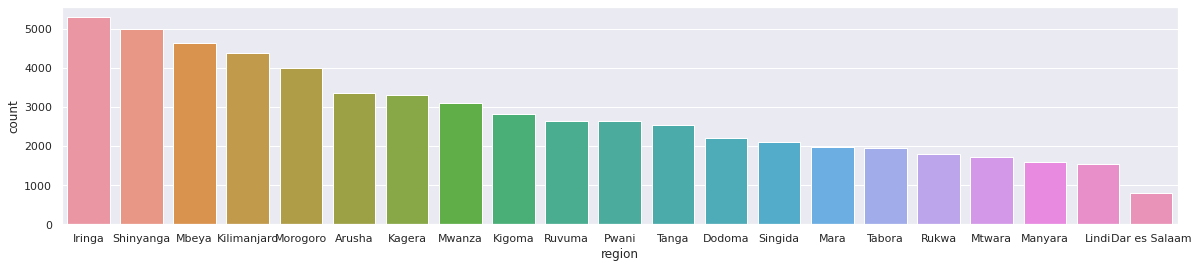

In [ ]:

# Categorical features of interest
sample_categorical_features = ['region']
for i in sample_categorical_features:
    print("***** \'{}\' feature distribution breakdown *****".format(i))
    #print(categorical_features_df[i].value_counts())
    sns.set(style='darkgrid')
    fig = plt.figure(figsize = (20,4))
    sns.countplot(x=i,data=data, order = data[i].value_counts().index)
    plt.show()

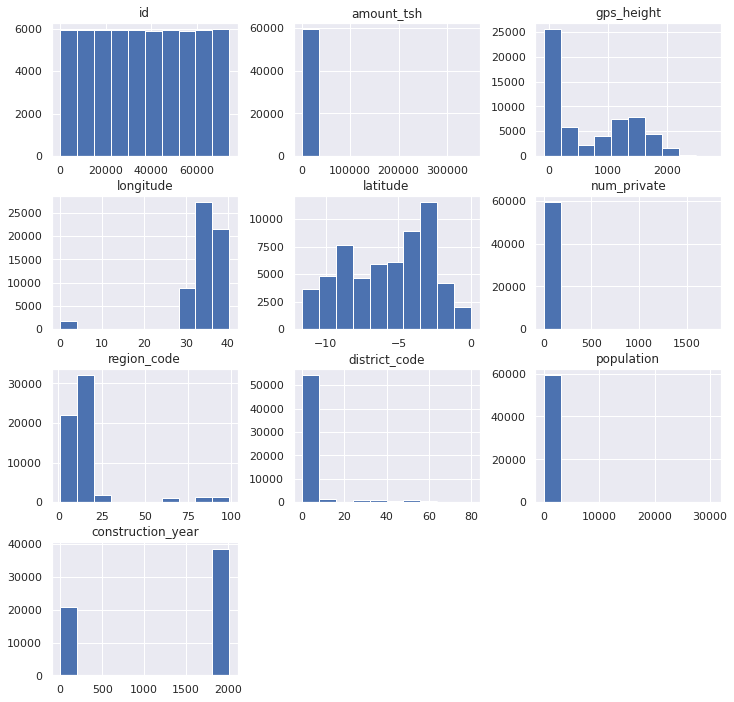

In [ ]:
data.hist(figsize=(12,12))
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


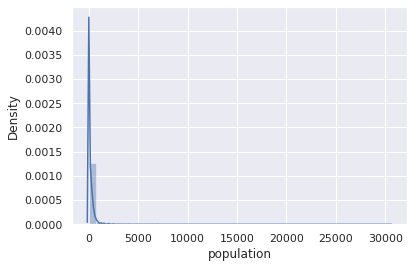

In [ ]:

sns.distplot(data.population, bins = 40)
plt.show()

In [ ]:
from collections import namedtuple, Counter, OrderedDict

def chist(catvar, alphalev=1): 
    hist = Counter(catvar)
    hist = OrderedDict(sorted(hist.items()))
    plt.bar(range(len(hist)), hist.values(), alpha=alphalev)
    plt.xticks([i for i in range(len(hist))], hist.keys(), rotation=90)
    plt.xlim([-1, len(hist)]);

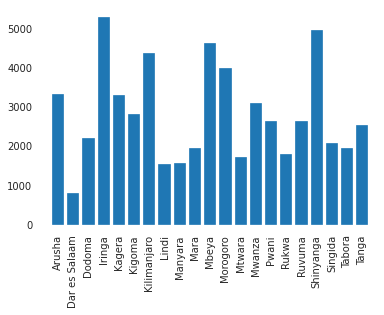

In [ ]:
# Distribution of regions
chist(data.region)

In [ ]:

#let's check the categorical features
numerical_features_df = data.select_dtypes(include=['int64','float64']).copy()
numerical_features_df.head()

id  amount_tsh  gps_height  ...  district_code  population  construction_year
0  69572      6000.0        1390  ...              5         109               1999
1   8776         0.0        1399  ...              2         280               2010
2  34310        25.0         686  ...              4         250               2009
3  67743         0.0         263  ...             63          58               1986
4  19728         0.0           0  ...              1           0                  0

[5 rows x 10 columns]

In [ ]:
data.groupby(['region_code', 'region']).size()


region_code  region       
1            Dodoma           2201
2            Arusha           3024
3            Kilimanjaro      4379
4            Tanga            2513
5            Morogoro         4006
             Tanga              34
6            Pwani            1609
7            Dar es Salaam     805
8            Lindi             300
9            Mtwara            390
10           Ruvuma           2640
11           Iringa           5294
             Shinyanga           6
12           Mbeya            4639
13           Singida          2093
14           Shinyanga          20
             Tabora           1959
15           Rukwa            1808
16           Kigoma           2816
17           Mwanza             55
             Shinyanga        4956
18           Kagera           3316
             Lindi               8
19           Mwanza           3047
20           Mara             1969
21           Manyara          1583
24           Arusha            326
40           Pwani          

In [ ]:
data

id  amount_tsh  ... waterpoint_type_group    status_group
0      69572      6000.0  ...    communal standpipe      functional
1       8776         0.0  ...    communal standpipe      functional
2      34310        25.0  ...    communal standpipe      functional
3      67743         0.0  ...    communal standpipe  non functional
4      19728         0.0  ...    communal standpipe      functional
...      ...         ...  ...                   ...             ...
59395  60739        10.0  ...    communal standpipe      functional
59396  27263      4700.0  ...    communal standpipe      functional
59397  37057         0.0  ...             hand pump      functional
59398  31282         0.0  ...             hand pump      functional
59399  26348         0.0  ...             hand pump      functional

[59400 rows x 41 columns]

Duplicated value

In [ ]:
# now check for duplicates
data.duplicated().sum()

0

Null Value

In [ ]:
# Check for nulls.

data.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [ ]:
# Function that displays all columns and rows when you use commands like df.head() and df_tail().

def display_all(data):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(data)

In [ ]:
from IPython.display import display

# Displays columns on the side instead of the top.

display_all(data.head().transpose())

0                        1  \
id                                       69572                     8776   
amount_tsh                                6000                        0   
date_recorded                       2011-03-14               2013-03-06   
funder                                   Roman                  Grumeti   
gps_height                                1390                     1399   
installer                                Roman                  GRUMETI   
longitude                              34.9381                  34.6988   
latitude                              -9.85632                 -2.14747   
wpt_name                                  none                 Zahanati   
num_private                                  0                        0   
basin                               Lake Nyasa            Lake Victoria   
subvillage                            Mnyusi B                  Nyamara   
region                                  Iringa                     Mara   
region_code                                 11                       20   
district_code                                5                        2   
lga                                     Ludewa                Serengeti   
ward                                  Mundindi                    Natta   
population                                 109                      280   
public_meeting                            True                      NaN   
recorded_by            GeoData Consultants Ltd  GeoData Consultants Ltd   
scheme_management                          VWC                    Other   
scheme_name                              Roman                      NaN   
permit                                   False                     True   
construction_year                         1999                     2010   
extraction_type                        gravity                  gravity   
extraction_type_group                  gravity                  gravity   
extraction_type_class                  gravity                  gravity   
management                                 vwc                      wug   
management_group                    user-group               user-group   
payment                           pay annually                never pay   
payment_type                          annually                never pay   
water_quality                             soft                     soft   
quality_group                             good                     good   
quantity                                enough             insufficient   
quantity_group                          enough             insufficient   
source                                  spring     rainwater harvesting   
source_type                             spring     rainwater harvesting   
source_class                       groundwater                  surface   
waterpoint_type             communal standpipe       communal standpipe   
waterpoint_type_group       communal standpipe       communal standpipe   
status_group                        functional               functional   

                                                 2  \
id                                           34310   
amount_tsh                                      25   
date_recorded                           2013-02-25   
funder                                Lottery Club   
gps_height                                     686   
installer                             World vision   
longitude                                  37.4607   
latitude                                  -3.82133   
wpt_name                               Kwa Mahundi   
num_private                                      0   
basin                                      Pangani   
subvillage                                 Majengo   
region                                     Manyara   
region_code                                     21   
district_code                                    4   
lga                           

##Missing value Impute

In [ ]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def funder_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'    
    else:
        return 'other'
    
df['funder'] = df.apply(lambda row: funder_wrangler(row), axis=1)

In [ ]:
df.installer.value_counts()

DWE               21751
Government         2282
RWE                1498
Commu              1347
DANIDA             1305
                  ...  
Mungaya               1
Samweli               1
SINGIDA  YETU         1
FinWter               1
CHONJA CHARLES        1
Name: installer, Length: 2410, dtype: int64

In [ ]:
# Create a function to reduce the amount of dummy columns needed whilst maintaining the 
# information contained in the column.

def installer_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'gov'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'    
    else:
        return 'other'
    
df['installer'] = df.apply(lambda row: installer_wrangler(row), axis=1)

In [ ]:
#Drop Subvillage

df = df.drop('subvillage', axis=1)

In [ ]:
# Replace Public_meeting missing values by unknown

df.public_meeting = df.public_meeting.fillna('Unknown')

In [ ]:

df.scheme_management.value_counts()

VWC                 45917
WUG                  6496
Water authority      3975
WUA                  3551
Water Board          3462
Parastatal           2124
Company              1341
Private operator     1326
Other                 996
SWC                   123
Trust                  92
None                    1
Name: scheme_management, dtype: int64

In [ ]:

def scheme_management_wrangler(row):  
    '''Keep top 5 values and set the rest to 'other'''

    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'    
    else:
        return 'other'
    
df['scheme_management'] = df.apply(lambda row: scheme_management_wrangler(row), axis=1)

In [ ]:
df.scheme_name.value_counts()

K                       858
None                    794
Borehole                704
Chalinze wate           501
M                       490
                       ... 
Mradi wa maji wa kag      1
Kwasenenge Group          1
Welela Shallow well       1
Nampemba                  1
Mlima wa Nyasho           1
Name: scheme_name, Length: 2868, dtype: int64

In [ ]:
#Drop scheme_name

df = df.drop('scheme_name', axis=1)

In [ ]:
#Replace permit missing values by unknown

df.permit = df.permit.fillna('Unknown')

In [ ]:
# Check for nulls.

data.apply(lambda x: sum(x.isnull()))

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity

In [ ]:
#Drop ind

df = df.drop('ind', axis=1)

In [ ]:

#View all the cateforical Value
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

date_recorded funder installer              wpt_name                    basin  ...           source_type source_class              waterpoint_type waterpoint_type_group    status_group
0    2011-03-14  other     other                  none               Lake Nyasa  ...                spring  groundwater           communal standpipe    communal standpipe      functional
1    2013-03-06  other     other              Zahanati            Lake Victoria  ...  rainwater harvesting      surface           communal standpipe    communal standpipe      functional
2    2013-02-25  other     other           Kwa Mahundi                  Pangani  ...                   dam      surface  communal standpipe multiple    communal standpipe      functional
3    2013-01-28  other     other  Zahanati Ya Nanyumbu  Ruvuma / Southern Coast  ...              borehole  groundwater  communal standpipe multiple    communal standpipe  non functional
4    2011-07-13  other     other               Shuleni            Lake Victoria  ...  rainwater harvesting      surface           communal standpipe    communal standpipe      functional

[5 rows x 29 columns]

In [ ]:

#View object columns
obj_df.columns

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group'], dtype='object')

In [ ]:
#Create dummy variable for all object columns
waterpump_data = pd.get_dummies(data=df, columns=['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 
                                                           'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type',
                                                           'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 
                                                           'waterpoint_type_group', 'status_group'], drop_first=True)

In [ ]:
waterpump_data

id  amount_tsh  gps_height  longitude   latitude  ...  waterpoint_type_group_hand pump  waterpoint_type_group_improved spring  waterpoint_type_group_other  status_group_functional needs repair  status_group_non functional
0      69572      6000.0        1390  34.938093  -9.856322  ...                                0                                      0                            0                                     0                            0
1       8776         0.0        1399  34.698766  -2.147466  ...                                0                                      0                            0                                     0                            0
2      34310        25.0         686  37.460664  -3.821329  ...                                0                                      0                            0                                     0                            0
3      67743         0.0         263  38.486161 -11.155298  ...                                0                                      0                            0                                     0                            1
4      19728         0.0           0  31.130847  -1.825359  ...                                0                                      0                            0                                     0                            0
...      ...         ...         ...        ...        ...  ...                              ...                                    ...                          ...                                   ...                          ...
14845  39307         0.0          34  38.852669  -6.582841  ...                                0                                      0                            0                                     0                            0
14846  18990      1000.0           0  37.451633  -5.350428  ...                                1                                      0                            0                                     0                            0
14847  28749         0.0        1476  34.739804  -4.585587  ...                                0                                      0                            0                                     0                            0
14848  33492         0.0         998  35.432732 -10.584159  ...                                0                                      0                            0                                     0                            0
14849  68707         0.0         481  34.765054 -11.226012  ...                                0                                      0                            0                                     0                            0

[74250 rows x 48441 columns]

In [ ]:

# Allocate dataset, first 1460 rows contain Saleprice, and remainning doesn't have SalePrice.
N_train = 14850
status_group_data = df[:N_train]
status_group_predict = df[N_train:]


print("Missing values for status_group_data:", np.any(status_group_data.isnull().values))
print("Missing values for the test:", np.any(status_group_predict.isnull().values))

Missing values for status_group_data: False
Missing values for the test: True


In [ ]:

#Load Liabry
import copy 

#Allocate variable to X and target variable 'SalePrice' to y 
y = status_group_data[(['status_group'])]
X = copy.deepcopy(status_group_data).drop(['status_group'], axis=1)
X_predict_statusgroup = copy.deepcopy(status_group_predict).drop(['status_group'], axis=1)



In [ ]:
X.head(3)

id  amount_tsh date_recorded funder  gps_height  ...                source           source_type  source_class              waterpoint_type  waterpoint_type_group
0  69572      6000.0    2011-03-14  other        1390  ...                spring                spring   groundwater           communal standpipe     communal standpipe
1   8776         0.0    2013-03-06  other        1399  ...  rainwater harvesting  rainwater harvesting       surface           communal standpipe     communal standpipe
2  34310        25.0    2013-02-25  other         686  ...                   dam                   dam       surface  communal standpipe multiple     communal standpipe

[3 rows x 38 columns]

In [ ]:
y.head()

status_group
0      functional
1      functional
2      functional
3  non functional
4      functional

In [ ]:
#Split the data after clean
test, train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]